In [295]:
import pandas as pd
import numpy as np

In [296]:
#veri okuma
data = pd.read_csv('C:/Users/DELL/Desktop/veri bilimi kampı/Şefiye Arıcan - Heart Disease Dataset.csv')
df = data.copy()
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
845,56,1,0,132,184,0,0,105,1,2.1,1,1,1,0
1014,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
393,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
187,56,1,0,125,249,1,0,144,1,1.2,1,1,2,0
147,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
641,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
540,58,1,0,128,259,0,0,130,1,3.0,1,2,3,0
526,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
928,54,1,0,124,266,0,0,109,1,2.2,1,1,3,0
866,41,1,2,112,250,0,1,179,0,0.0,2,0,2,1


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [298]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [299]:
#eksik veri var mı?
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [300]:
#kategorik veri yok

In [301]:
#aykırı veri var mı?
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = 20)

In [302]:
scores = lof.fit_predict(df)

In [303]:
scores

array([1, 1, 1, ..., 1, 1, 1])

In [304]:
np.where(scores == -1)[0]

array([ 101,  151,  158,  192,  246,  267,  269,  285,  296,  326,  336,
        356,  378,  391,  464,  475,  559,  587,  605,  630,  682,  709,
        733,  769,  964, 1014], dtype=int64)

In [305]:
data.loc[np.where(scores == -1)[0]]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
101,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
151,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
192,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
246,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
267,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
269,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
285,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
296,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
326,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0


In [306]:
#aykırı verileri siliyorum
df.drop(np.where(scores == -1)[0], axis=0, inplace=True)

In [307]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [308]:
new_df = df
new_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [309]:
#scatter
import plotly.graph_objs as go
from plotly.offline import iplot

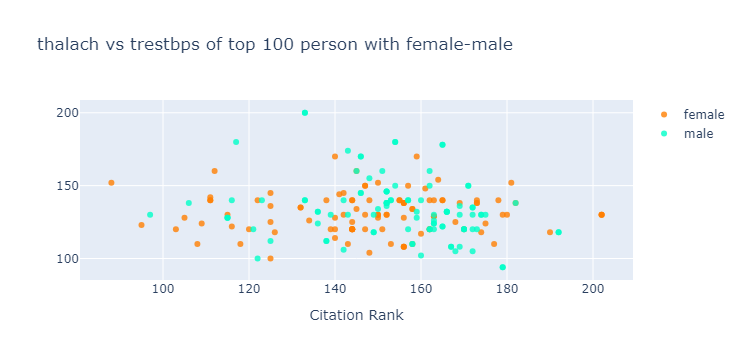

In [310]:
#veri görselleştirme scatter
df_female = df[df.sex == 1].iloc[:100,:]
df_male = df[df.sex == 0].iloc[:100,:]

trace1 = go.Scatter(
    x=df_female.thalach, y=df_female.trestbps, mode='markers', name="female", marker=dict(color='rgba(255,128,2,0.8)'), text=df_female.target
)
trace2 = go.Scatter(
    x=df_male.thalach, y=df_male.trestbps, mode='markers', name="male", marker=dict(color='rgba(0,255,200,0.8)'), text=df_female.target
)
data = [trace1, trace2]
layout=dict(title='thalach vs trestbps of top 100 person with female-male', xaxis=dict (title='Citation Rank', ticklen=5, zeroline=False))

fig=dict(data=data,layout=layout)
iplot(fig)

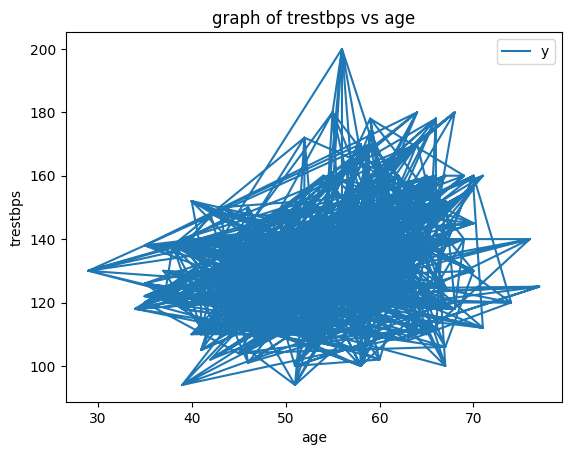

In [311]:
#çizgi grafiği
import matplotlib.pyplot as plt

x = df['age']
y = df['trestbps']

df = pd.DataFrame({'x': x, 'y': y})

df.plot(x='x', y='y', kind='line')

plt.title('graph of trestbps vs age')
plt.xlabel('age')
plt.ylabel('trestbps')

plt.show()

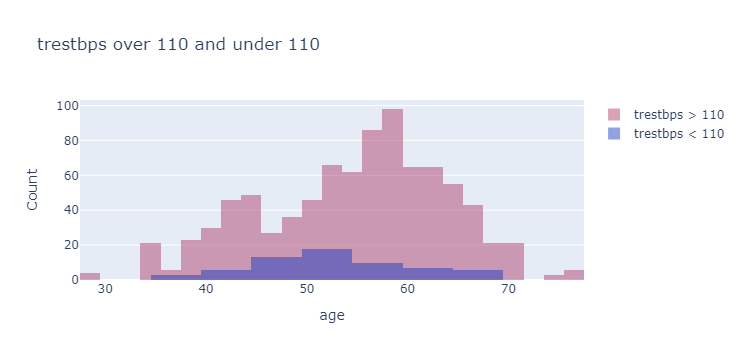

In [312]:
df_110ustu = new_df['age'][new_df.trestbps > 110]
df_110altı = new_df['age'][new_df.trestbps < 110]

trace=go.Histogram(
    x=df_110ustu,opacity=0.75, name='trestbps > 110', marker=dict(color='rgba(171,50,96,0.6)')
)
trace2=go.Histogram(
    x=df_110altı,opacity=0.75, name='trestbps < 110', marker=dict(color='rgba(12,50,196,0.6)')
)

data=[trace,trace2]
layout=go.Layout(barmode='overlay',title='trestbps over 110 and under 110', xaxis=dict(title='age'), yaxis=dict(title='Count'))
fig=go.Figure(data=data, layout=layout)
iplot(fig)

In [334]:
#veri özellik çıkarımı (selectkbest)
from sklearn.feature_selection import SelectKBest,f_classif

X = new_df.drop('target',axis=1)
y = new_df['target']

selector = SelectKBest(score_func=f_classif, k=4)
selector.fit(x,y)

SelectKBest(k=4)

In [335]:
selector.scores_

array([231.59266277, 220.15258122, 249.17111048, 243.94273116])

In [336]:
selector.get_support(indices=True) 

array([0, 1, 2, 3], dtype=int64)

In [337]:
X.columns[selector.get_support(indices=True)] #en iyi columns

Index(['age', 'sex', 'cp', 'trestbps'], dtype='object')

In [338]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [339]:
X.drop(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'slope', 'ca', 'thal'], axis=1, inplace=True)
X.sample(10)

,cp,thalach,exang,oldpeak
437,0,129,1,2.6
123,2,157,0,0.8
497,1,164,0,0.0
772,0,154,1,1.4
102,1,156,0,0.0
997,0,113,0,1.4
701,0,130,1,1.6
265,0,148,1,3.0
387,0,162,1,0.0
431,0,114,0,1.0


In [340]:
#StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [341]:
x = scaler.fit_transform(X.values)
x

array([[-0.90524653,  0.83566366, -0.72630774, -0.06886829],
       [-0.90524653,  0.25120763,  1.37682685,  1.70387745],
       [-0.90524653, -1.09753704,  1.37682685,  1.28179513],
       ...,
       [-0.90524653, -1.41224413,  1.37682685, -0.06886829],
       [-0.90524653,  0.43104026, -0.72630774, -0.91303292],
       [-0.90524653, -1.63703491, -0.72630774,  0.26879757]])

In [342]:
X = pd.DataFrame(x,columns=['cp', 'thalach', 'exang', 'oldpeak'])
X

,cp,thalach,exang,oldpeak
0,-0.905247,0.835664,-0.726308,-0.068868
1,-0.905247,0.251208,1.376827,1.703877
2,-0.905247,-1.097537,1.376827,1.281795
3,-0.905247,0.520957,-0.726308,-0.913033
4,-0.905247,-1.951742,-0.726308,0.690880
...,...,...,...,...
994,0.069259,0.655831,1.376827,-0.913033
995,-0.905247,-0.378207,1.376827,1.450628
996,-0.905247,-1.412244,1.376827,-0.068868
997,-0.905247,0.431040,-0.726308,-0.913033


In [343]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [344]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [345]:
models = {'RF':RandomForestClassifier(),'GB':GradientBoostingClassifier(), 'SVM':SVC(), 'XGB':xgb.XGBClassifier()}

In [346]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

for modelName, model in models.items():
    #print(modelName, model)
    model.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f"Model: {modelName}, Accuracy: {accuracy}")

Model: RF, Accuracy: 0.975
Model: GB, Accuracy: 0.88
Model: SVM, Accuracy: 0.795
Model: XGB, Accuracy: 0.975


In [360]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.975


In [362]:
RF = RandomForestClassifier()

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
  
grid = GridSearchCV(RF, cv=5, param_grid=param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, n_est

C:\Users\DELL\PycharmProjects\pythonProject1\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\PycharmProjects\pythonProject1\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\PycharmProjects\pythonProject1\.venv\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\DELL\PycharmProjects\pythonProject1\.venv\Lib\site-packages\sklearn\base.py", line 666,

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             verbose=3)

In [363]:
grid.score(X_test, y_test)

0.945

In [364]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [365]:
model = grid.best_estimator_

In [372]:
model.score(X_test, y_test)

0.945

In [373]:
import pickle
with open ('heartDiseadeModel.pkl', 'wb') as f:
    pickle.dump(model, f)

with open ('heartDiseadeModel.pkl', 'rb') as f:
    rf = pickle.load(f)

In [374]:
rf.score(X_test, y_test)

0.945

In [375]:
new_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [376]:
new_df.to_csv('C:/Users/DELL/Desktop/veri bilimi kampı/CLEANED_Şefiye Arıcan - Heart Disease Dataset.csv')